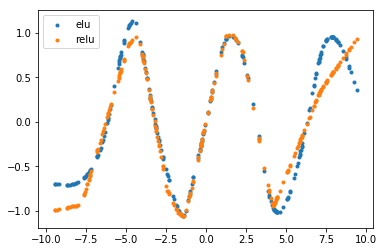

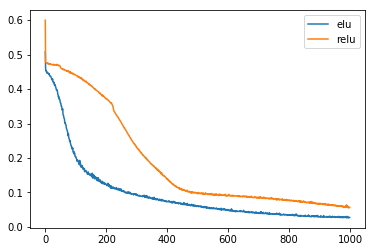

In [4]:
# predict a simple trig function with deep learning

import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

NUM_SAMPLES = 1000
FREQ = 3
NUM_TRAIN_SAMPLES = int(NUM_SAMPLES * 0.75)

batch_size = 50
epochs = 1000

def func(x):
    return np.sin(x) + np.random.randn(*x.shape)*0.1

x = (np.random.rand(NUM_SAMPLES, 1) - 0.5) * 2*np.pi * FREQ
y = func(x)

x_train, y_train = x[:NUM_TRAIN_SAMPLES], y[:NUM_TRAIN_SAMPLES]
x_test, y_test = x[NUM_TRAIN_SAMPLES:], y[NUM_TRAIN_SAMPLES:]



def create_network(hidden_units, activation):
    x_in = keras.Input(shape=[1])
    x = x_in
    for units in hidden_units:
        x = keras.layers.Dense(units, activation=activation)(x)
    x = keras.layers.Dense(1)(x)
    model = keras.models.Model(inputs=x_in, outputs=x)
    model.compile(keras.optimizers.SGD(), loss='mse', metrics=['mse'])
    return model

hidden_layers = [10,10]
activations = ['elu', 'relu']
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
for activation in activations:
    model = create_network(hidden_layers, activation)
    history = model.fit(verbose=False, x=x_train, y=y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs, shuffle=True)

    pred = model.predict(x_test)
    ax1.scatter(x_test, pred, label=activation, marker='.')
    ax2.plot(history.history['loss'], label=activation)

ax1.legend()
ax2.legend()
plt.show()